# This notebook contains functions (with examples) for calculating emittance from quadrupole beam size scans

# Option 1: 
## Calculate emittance via unconstrained (not physically validated) parabolic fit

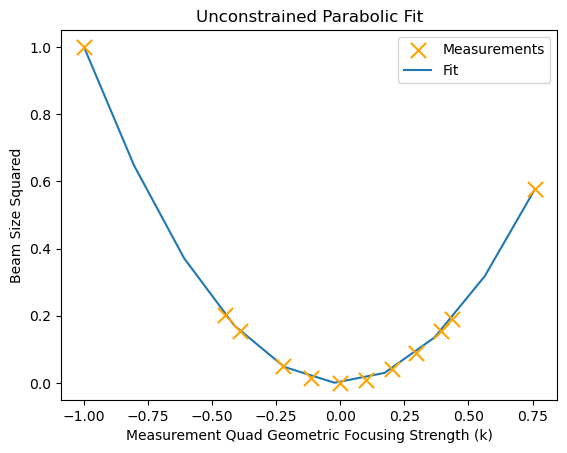

(array([[nan]]),
 array([[-1.7265393e-06]]),
 array([False]),
 array([[ 1.00000000e+00,  0.00000000e+00, -2.77555756e-16]]),
 array([[[16.78555134, -7.4272352 ],
         [-7.4272352 ,  3.2863872 ]]]))

In [1]:
import numpy as np
import torch
from emitopt.utils import compute_emit_from_single_beamsize_scan_numpy
from emitopt.utils import get_valid_emit_samples_from_quad_scan
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
k_meas = np.array([0.000000,
                    0.100000,
                    -1.000000,
                    -0.392787,
                    0.297180,
                    0.759159,
                    -0.223823,
                    0.394187,
                    -0.450012,
                    -0.115379,
                    0.200063,
                    0.436399])

rms_beam_size = np.array([0.000000,
                       0.100000,
                       1.000000,
                       0.392787,
                       0.297180,
                       0.759159,
                       0.223823,
                       0.394187,
                       0.450012,
                       0.115379,
                       0.200063,
                       0.436399 ])

compute_emit_from_single_beamsize_scan_numpy(k_meas, rms_beam_size, q_len=.108, distance=2.26, visualize=True)

# Option 2: 
## Fit bayesian model to scan values, 
## evaluate virtual measurement scans using model posterior samples,
## get unconstrained (not physically validated) parabolic fits from virtual scan values, 
## validate (reject unphysical) results

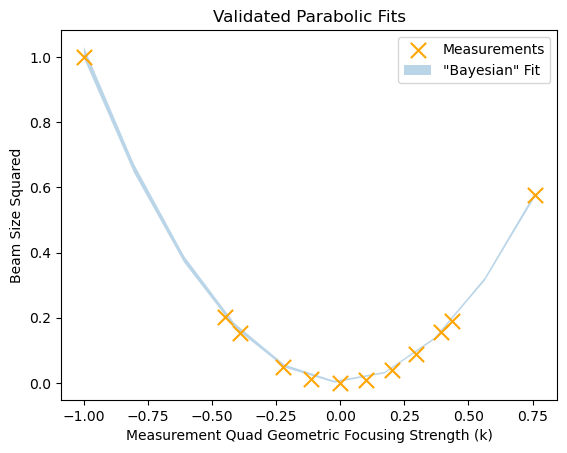

Bayesian emittance calc took 0.343 seconds.


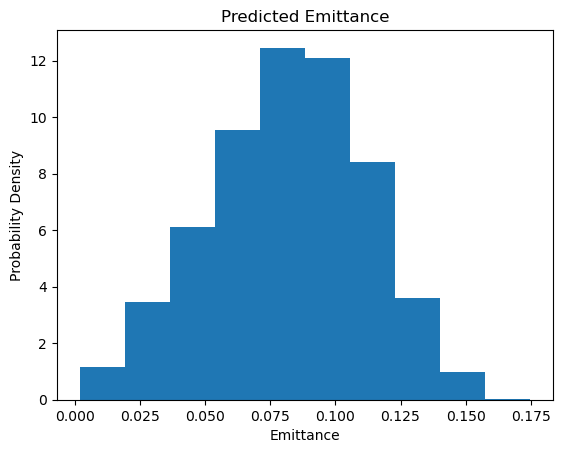

In [2]:
import time

start = time.time()

(emits_valid, 
 emits_sq, 
 is_valid, 
 sample_validity_rate, 
 sigmas_all) = get_valid_emit_samples_from_quad_scan(k_meas, 
                                                     rms_beam_size, 
                                                     q_len=.108, 
                                                     distance=2.26, 
                                                     n_samples=10000, 
                                                     visualize=True)

end = time.time()

from matplotlib import pyplot as plt
plt.hist(emits_valid.flatten(), density=True)
plt.title('Predicted Emittance')
plt.xlabel('Emittance')
plt.ylabel('Probability Density')
print('Bayesian emittance calc took', round(end-start, 3) ,'seconds.')
